<a href="https://colab.research.google.com/github/ayushmanZ/Amazon-music-reviews-case-study/blob/main/Review_analysis_of_amazonMusic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install google-play-scraper
from google_play_scraper import app, Sort, reviews_all,reviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Define and configure Google Play Scraper library
hk_users_reviews,continuation_token = reviews(
    'com.amazon.mp3',
   
    lang='en', # Default language is 'en', set language to English.
    country='in', # Default country is 'us', set country to India.
    sort=Sort.NEWEST,
    count=2000 # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(hk_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,b92b6149-2316-4f2c-8c10-59ab09e6e4bc,Robert Macone,https://play-lh.googleusercontent.com/a-/AD5-W...,"After the last update, you are unable to play ...",1,0,22.15.11,2022-12-21 16:03:36,None,None
1,a2184ca6-ebd5-4c35-aa06-ac9509fdcde1,Amber Beckett,https://play-lh.googleusercontent.com/a/AEdFTp...,Frequently crashes or stops recognizing podcas...,2,0,None,2022-12-21 16:02:18,None,None
2,f4bae5b1-60b8-425f-974b-3d61e3a5805f,Geeta Chugh,https://play-lh.googleusercontent.com/a/AEdFTp...,Useless,1,0,22.15.11,2022-12-21 16:00:39,None,None
3,d93938fb-2f31-4c7f-9944-3950ae335042,Asstenga “asstenga”,https://play-lh.googleusercontent.com/a-/AD5-W...,Really good music app!!! Great variety of arti...,3,1,22.15.2,2022-12-21 15:59:27,None,None
4,b141f1c2-3bca-44b2-947a-4f93d93f1311,Coy Hannah,https://play-lh.googleusercontent.com/a-/AD5-W...,Since update constantly crashing.. I have had ...,2,0,22.15.11,2022-12-21 15:53:55,None,None


In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2000 non-null   object        
 1   userName              2000 non-null   object        
 2   userImage             2000 non-null   object        
 3   content               2000 non-null   object        
 4   score                 2000 non-null   int64         
 5   thumbsUpCount         2000 non-null   int64         
 6   reviewCreatedVersion  1778 non-null   object        
 7   at                    2000 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 156.4+ KB


In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

1    1015
5     397
2     317
3     170
4     101
Name: score, dtype: int64

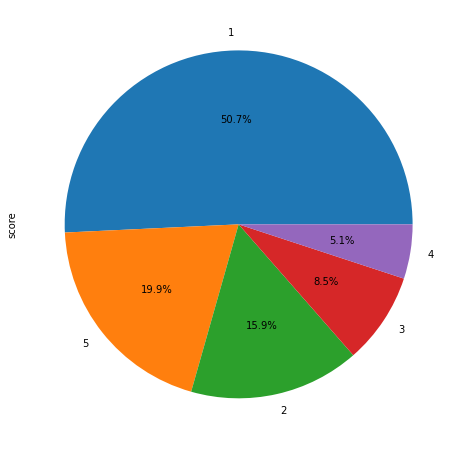

In [ ]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,"After the last update, you are unable to play ...",1
1,Frequently crashes or stops recognizing podcas...,2
2,Useless,1
3,Really good music app!!! Great variety of arti...,3
4,Since update constantly crashing.. I have had ...,2


In [ ]:
df_reviews_content.shape

(2000, 2)

In [ ]:
import re    # for regular expressions 
import nltk

In [ ]:
import re  
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
df_reviews_content['tidy_tweet'] = np.vectorize(remove_pattern)(df_reviews_content['content'], "@[\w]*") 
df_reviews_content.head(10)

,content,score,tidy_tweet
0,"After the last update, you are unable to play ...",1,"After the last update, you are unable to play ..."
1,Frequently crashes or stops recognizing podcas...,2,Frequently crashes or stops recognizing podcas...
2,Useless,1,Useless
3,Really good music app!!! Great variety of arti...,3,Really good music app!!! Great variety of arti...
4,Since update constantly crashing.. I have had ...,2,Since update constantly crashing.. I have had ...
5,Amazon Music plays the same songs all the time...,2,Amazon Music plays the same songs all the time...
6,Every time they update the app it gets worse a...,1,Every time they update the app it gets worse a...
7,Bogus app .. have issues now & then. Only plus...,2,Bogus app .. have issues now & then. Only plus...
8,Worst app,1,Worst app
9,Even if we have downloaded songs for offline m...,1,Even if we have downloaded songs for offline m...


In [ ]:
tokenized_tweet = df_reviews_content.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0    [After, the, last, update,, you, are, unable, ...
1    [Frequently, crashes, or, stops, recognizing, ...
2                                            [Useless]
3    [Really, good, music, app!!!, Great, variety, ...
4    [Since, update, constantly, crashing.., I, hav...
Name: tidy_tweet, dtype: object

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [after, the, last, update,, you, are, unabl, t...
1    [frequent, crash, or, stop, recogn, podcast, a...
2                                            [useless]
3    [realli, good, music, app!!!, great, varieti, ...
4    [sinc, updat, constantli, crashing.., i, have,...
Name: tidy_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
df_reviews_content['tidy_tweet'] = tokenized_tweet
df_reviews_content.head(10)

,content,score,tidy_tweet
0,"After the last update, you are unable to play ...",1,"after the last update, you are unabl to play t..."
1,Frequently crashes or stops recognizing podcas...,2,frequent crash or stop recogn podcast as they'...
2,Useless,1,useless
3,Really good music app!!! Great variety of arti...,3,realli good music app!!! great varieti of arti...
4,Since update constantly crashing.. I have had ...,2,sinc updat constantli crashing.. i have had 6 ...
5,Amazon Music plays the same songs all the time...,2,amazon music play the same song all the time. ...
6,Every time they update the app it gets worse a...,1,everi time they updat the app it get wors and ...
7,Bogus app .. have issues now & then. Only plus...,2,bogu app .. have issu now & then. onli plu poi...
8,Worst app,1,worst app
9,Even if we have downloaded songs for offline m...,1,even if we have download song for offlin music...


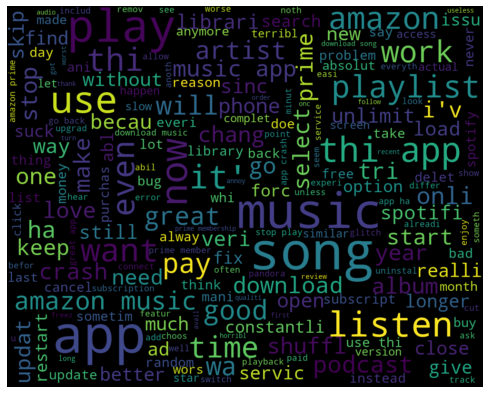

In [ ]:
all_words = ' '.join([text for text in df_reviews_content['tidy_tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

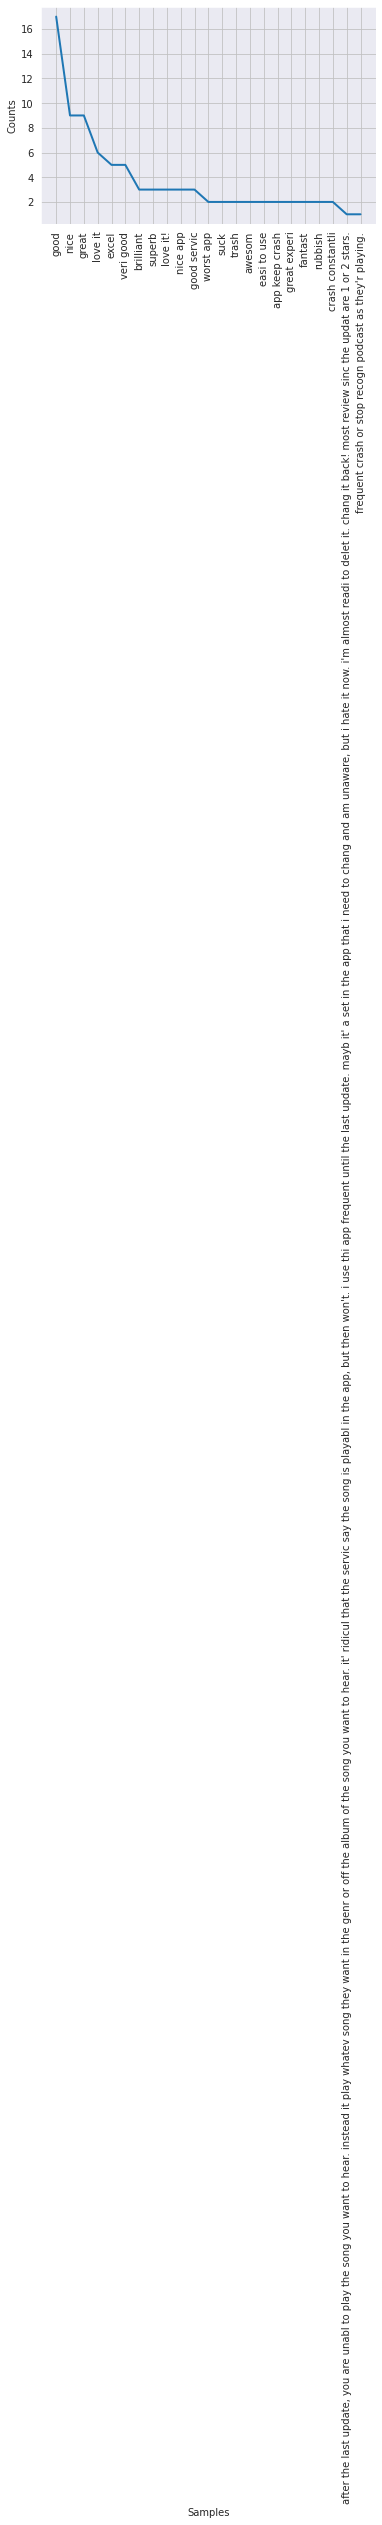

In [ ]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(df_reviews_content["tidy_tweet"])
nlp_words.plot(23);

In [ ]:
a = nltk.FreqDist(df_reviews_content["tidy_tweet"])
d = pd.DataFrame(
    {
    'word': list(a.keys()),
    'Count': list(a.values())
    }
)

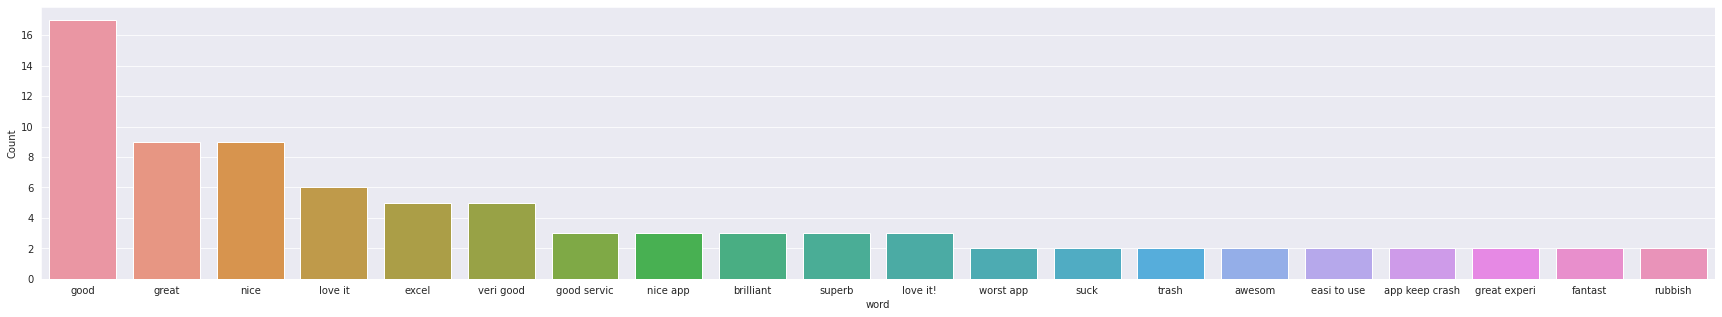

In [ ]:
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,5))
ax = sns.barplot(data=d, x= "word", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df_reviews_content["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_reviews_content["tidy_tweet"]]
df_reviews_content["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_reviews_content["tidy_tweet"]]
df_reviews_content["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_reviews_content["tidy_tweet"]]
print(df_reviews_content.head())

                                             content  score  \
0  After the last update, you are unable to play ...      1   
1  Frequently crashes or stops recognizing podcas...      2   
2                                            Useless      1   
3  Really good music app!!! Great variety of arti...      3   
4  Since update constantly crashing.. I have had ...      2   

                                          tidy_tweet  Positive  Negative  \
0  after the last update, you are unabl to play t...     0.068     0.074   
1  frequent crash or stop recogn podcast as they'...     0.142     0.386   
2                                            useless     0.000     1.000   
3  realli good music app!!! great varieti of arti...     0.205     0.165   
4  sinc updat constantli crashing.. i have had 6 ...     0.000     0.000   

   Neutral  
0    0.858  
1    0.472  
2    0.000  
3    0.630  
4    1.000  


In [ ]:
print(df_reviews_content.head())

                                             content  score  \
0  After the last update, you are unable to play ...      1   
1  Frequently crashes or stops recognizing podcas...      2   
2                                            Useless      1   
3  Really good music app!!! Great variety of arti...      3   
4  Since update constantly crashing.. I have had ...      2   

                                          tidy_tweet  Positive  Negative  \
0  after the last update, you are unabl to play t...     0.068     0.074   
1  frequent crash or stop recogn podcast as they'...     0.142     0.386   
2                                            useless     0.000     1.000   
3  realli good music app!!! great varieti of arti...     0.205     0.165   
4  sinc updat constantli crashing.. i have had 6 ...     0.000     0.000   

   Neutral  
0    0.858  
1    0.472  
2    0.000  
3    0.630  
4    1.000  


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<Figure size 432x288 with 0 Axes>

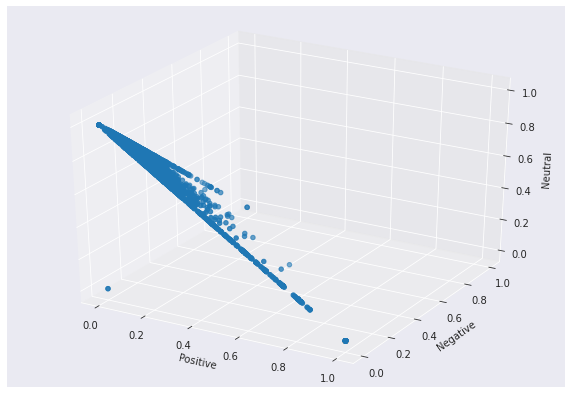

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(df_reviews_content["Positive"], df_reviews_content["Negative"], df_reviews_content["Neutral"])
ax.set_xlabel('Positive')
ax.set_ylabel('Negative')
ax.set_zlabel('Neutral')
plt.show()